# General tests of te AIS

Created on Tue Nov 22 16h24m,  2022

This is a script for the development of general tests

@author: denis


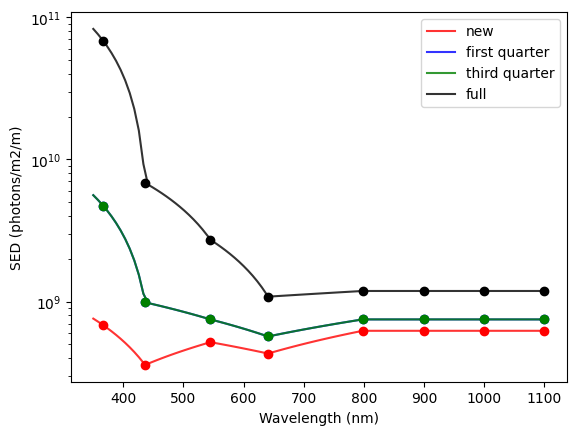

In [2]:
# PLOT SKY SED
from AIS.Spectral_Energy_Distribution import Sky
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ss = pd.read_csv("AIS/Spectral_Energy_Distribution/moon_magnitude.csv")
wv = np.linspace(350, 1100, 100)
colors = ["r", "b", "g", "k"]
for idx, moon in enumerate(["new", "first quarter", "third quarter", "full"]):
    sky = Sky()
    sky_sed = sky.calculate_sed(moon, wv)
    plt.semilogy(wv, sky_sed[0], colors[idx], alpha=0.8, label=moon)
    plt.semilogy(
        ss["wavelength"], sky._calculate_photons_density(ss[moon]), "o" + colors[idx]
    )

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("SED (photons/m2/m)")
plt.show()

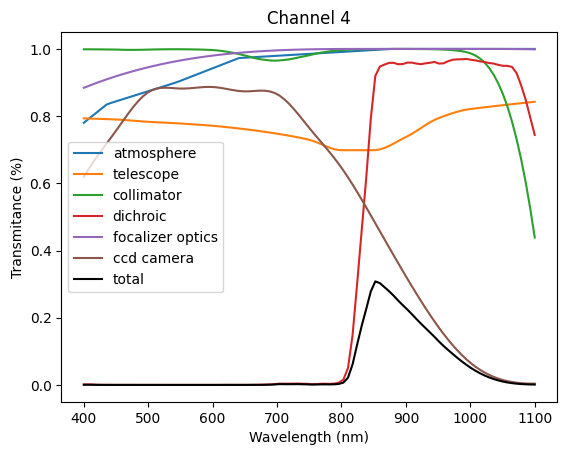

In [9]:
# PLOT THE SPECTRAL RESPONSE OF EACH COMPONENT OF ONE CHANNEL

from AIS.Spectral_Response import Channel, Atmosphere, Telescope

import matplotlib.pyplot as plt

import numpy as np
import os


sr_total = np.ones(100)

wv = np.linspace(400, 1100, 100)


atm = Atmosphere()

sr = atm.get_spectral_response(wv, 1, "photometric")

sr_total *= sr

plt.plot(wv, sr, label="atmosphere")


tel = Telescope()

sr = tel.get_spectral_response(wv)

sr_total *= sr

plt.plot(wv, sr, label="telescope")


_channel_id = 4

channel = Channel(_channel_id)

sr = channel.get_spectral_response(wv, "collimator.csv")

sr_total *= sr

plt.plot(wv, sr, label="collimator")

sr = channel.get_spectral_response(wv, f"Channel {_channel_id}/dichroic.csv")

sr_total *= sr

plt.plot(wv, sr, label="dichroic")

sr = channel.get_spectral_response(wv, f"Channel {_channel_id}/camera.csv")

sr_total *= sr

plt.plot(wv, sr, label="focalizer optics")

sr = channel.get_spectral_response(wv, f"Channel {_channel_id}/ccd.csv")

sr_total *= sr

plt.plot(wv, sr, label="ccd camera")


plt.plot(wv, sr_total, "k", label="total")

plt.legend()  # loc='lower right')

plt.xlabel("Wavelength (nm)")

plt.ylabel("Transmitance (%)")

plt.title(f"Channel {_channel_id}")

plt.savefig(os.path.join("notebook", "figures", f"Channel {_channel_id}.png"), dpi=300)
plt.show()

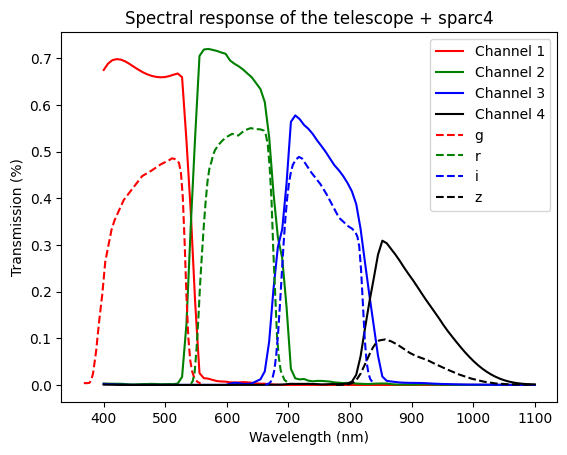

In [11]:
# PLOT SPECTRAL RESPONSE SPARC + SDSS WITH TELESCOPE

from AIS.Artificial_Image_Simulator import Artificial_Image_Simulator

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os


# http://www.ioa.s.u-tokyo.ac.jp/~doi/sdss/SDSSresponse.html


sed = np.ones(100)

wv = np.linspace(400, 1100, 100)

colors = ["r", "g", "b", "k"]

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}

for i in [1, 2, 3, 4]:
    ais = Artificial_Image_Simulator(
        ccd_operation_mode, channel_id=i, ccd_temperature=-70
    )

    ais.write_source_sed(wv, sed)

    ais.create_sky_sed(moon_phase="new")

    # ais.apply_atmosphere_spectral_response(sky_condition="regular")

    ais.apply_telescope_spectral_response()

    ais.apply_sparc4_spectral_response(acquisition_mode="photometry")

    plt.plot(wv, ais.source_sed, colors[i - 1], label=f"Channel {i}")


base_path = os.path.join("notebook", "data_files", "SDSS_tel")

file = os.path.join(base_path, "g_filter.csv")

data = pd.read_csv(file)

plt.plot(data["Wavelength (angstroms)"] / 10, data["Transmission"], "r--", label="g")

file = os.path.join(base_path, "r_filter.csv")

data = pd.read_csv(file)

plt.plot(data["Wavelength (angstroms)"] / 10, data["Transmission"], "g--", label="r")

file = os.path.join(base_path, "i_filter.csv")

data = pd.read_csv(file)

plt.plot(data["Wavelength (angstroms)"] / 10, data["Transmission"], "b--", label="i")

file = os.path.join(base_path, "z_filter.csv")

data = pd.read_csv(file)

plt.plot(data["Wavelength (angstroms)"] / 10, data["Transmission"], "k--", label="z")


plt.legend()

plt.xlabel("Wavelength (nm)")

plt.ylabel("Transmission (%)")

plt.title("Spectral response of the telescope + sparc4")

plt.savefig(os.path.join("notebook", "figures", "sparc4_photometry.png"), dpi=300)

plt.show()

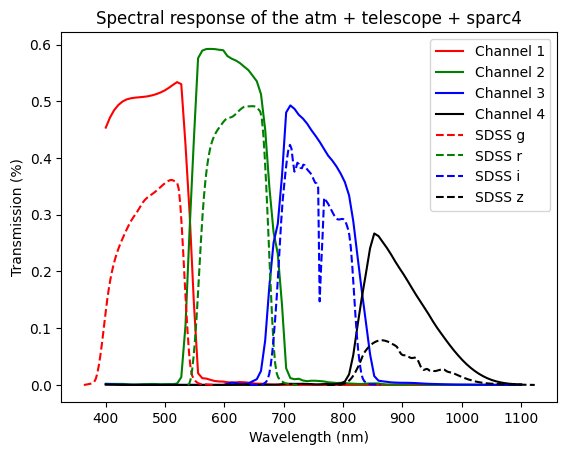

In [9]:
# PLOT SPECTRAL RESPONSE SPARC + SDSS WITH TELESCOPE AND ATM

from AIS.Artificial_Image_Simulator import Artificial_Image_Simulator

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os


# http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?id=SLOAN/SDSS.g&&mode=browse&gname=SLOAN&gname2=SDSS#filter


sed = np.ones(100)

wv = np.linspace(400, 1100, 100)

colors = ["r", "g", "b", "k"]

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}

for i in [1, 2, 3, 4]:
    ais = Artificial_Image_Simulator(
        ccd_operation_mode, channel_id=i, ccd_temperature=-70
    )

    ais.write_source_sed(wv, sed)

    ais.create_sky_sed(moon_phase="new")

    ais.apply_atmosphere_spectral_response(sky_condition="regular")

    ais.apply_telescope_spectral_response()

    ais.apply_sparc4_spectral_response(acquisition_mode="photometry")

    plt.plot(wv, ais.source_sed, colors[i - 1], label=f"Channel {i}")


base_path = os.path.join("notebook", "data_files", "SDSS_atm_tel")

for idx, filter in enumerate(["g", "r", "i", "z"]):
    file = os.path.join(base_path, f"SLOAN_SDSS.{filter}.dat")

    wv, resp = [], []

    with open(file) as arq:
        lines = arq.read().splitlines()

    for line in lines:
        tmp1, tmp2 = line.split(" ")

        wv.append(float(tmp1) / 10)

        resp.append(float(tmp2))

    plt.plot(wv, resp, f"{colors[idx]}--", label=f"SDSS {filter}")


plt.legend()

plt.xlabel("Wavelength (nm)")

plt.ylabel("Transmission (%)")

plt.title("Spectral response of the atm + telescope + sparc4")

plt.savefig(os.path.join("notebook", "figures", "sparc4_photometry.png"), dpi=300)

plt.show()

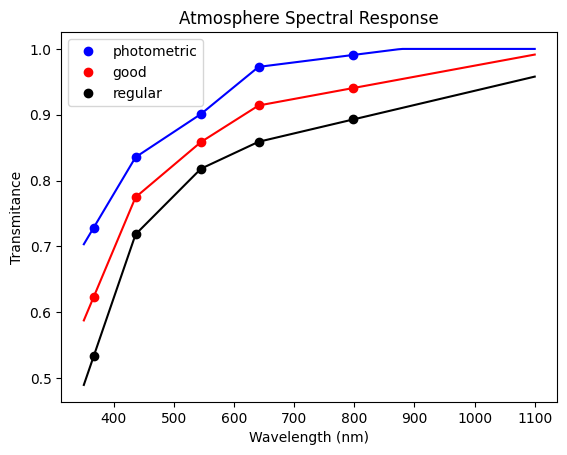

In [3]:
# PLOT ATM SPECTRAL RESPONSE


from AIS.Spectral_Response import Atmosphere

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd


obj_wavelength = np.linspace(350, 1100, 100)

ss = pd.read_csv("AIS/Spectral_Response/willton.csv")

wv = ss["Wavelength (nm)"]

photometric = 10 ** (-0.4 * ss["photometric"])

good = 10 ** (-0.4 * ss["good"])

regular = 10 ** (-0.4 * ss["regular"])

plt.plot(wv, photometric, "bo", label="photometric")

plt.plot(wv, good, "ro", label="good")

plt.plot(wv, regular, "ko", label="regular")


atmosphere = Atmosphere()

spectral_response = atmosphere.get_spectral_response(obj_wavelength, 1)

plt.plot(obj_wavelength, spectral_response, "b")

spectral_response = atmosphere.get_spectral_response(obj_wavelength, 1, "good")

plt.plot(obj_wavelength, spectral_response, "r")

spectral_response = atmosphere.get_spectral_response(obj_wavelength, 1, "regular")

plt.plot(obj_wavelength, spectral_response, "k")

plt.xlabel("Wavelength (nm)")

plt.ylabel("Transmitance")

plt.title("Atmosphere Spectral Response")

plt.legend()

plt.savefig("notebook/figures/atmosphere_spec_response.png", dpi=300)

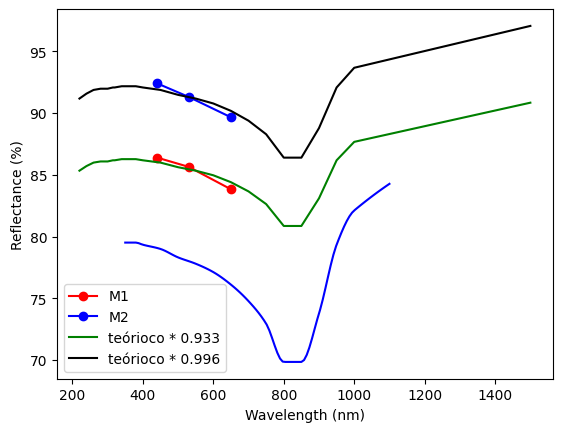

In [11]:
# PLOT SPECTRAL RESPONSE TELESCOPE

from AIS.Spectral_Response import Telescope
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import splrep, splev
from scipy.optimize import curve_fit
from sys import exit
import os


obj_wavelength = np.linspace(350, 1100, 100)
telescope = Telescope()
spectral_response = telescope.get_spectral_response(obj_wavelength) * 100
plt.plot(obj_wavelength, spectral_response, "b")

# ----------------------------------------------------------------------------------

wv = [440, 530, 650]
M1 = [86.392, 85.641, 83.825]
M2 = [92.40375, 91.3025, 89.65375]

ss = pd.read_csv("AIS/Spectral_Response/telescope.csv")


def func(x, c):
    ss = pd.read_csv("AIS/Spectral_Response/telescope.csv")
    spl = splrep(ss["Wavelength (nm)"], ss["Transmitance (%)"])
    spectral_response = splev(x, spl)
    return spectral_response * c


popt_M1, _ = curve_fit(func, wv, M1)
popt_M2, _ = curve_fit(func, wv, M2)

plt.plot(wv, M1, "o-r", label="M1")
plt.plot(wv, M2, "o-b", label="M2")
plt.plot(
    ss["Wavelength (nm)"],
    ss["Transmitance (%)"] * popt_M1[0],
    "g",
    label=f"teórioco * {popt_M1[0]:.3f}",
)
plt.plot(
    ss["Wavelength (nm)"],
    ss["Transmitance (%)"] * popt_M2[0],
    "k",
    label=f"teórioco * {popt_M2[0]:.3f}",
)
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (%)")
plt.savefig(os.path.join("notebook", "figures", "adjust_aluminium_curve.png"))
plt.show()

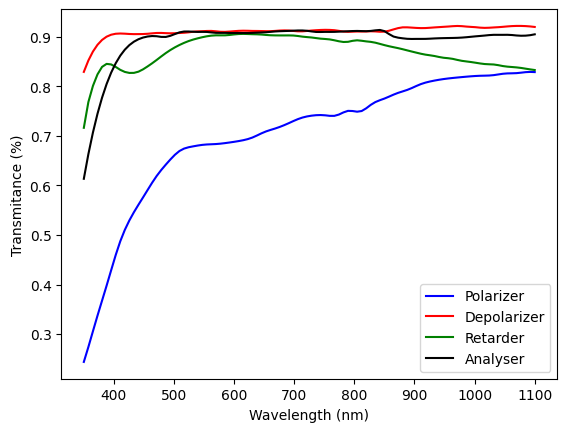

In [12]:
# SPECTRAL RESPONSES OF THE POLARIMETRIC COMPONENTS

from AIS.Spectral_Response import Channel
import numpy as np
import matplotlib.pyplot as plt
import os

wv = np.linspace(350, 1100, 100)
channel = Channel(1)
spectral_response = channel.get_spectral_response(wv, "polarizer.csv")
plt.plot(wv, spectral_response, "b", label="Polarizer")

spectral_response = channel.get_spectral_response(wv, "depolarizer.csv")
plt.plot(wv, spectral_response, "r", label="Depolarizer")

spectral_response = channel.get_spectral_response(wv, "retarder.csv")
plt.plot(wv, spectral_response, "g", label="Retarder")

spectral_response = channel.get_spectral_response(wv, "analyzer.csv")
plt.plot(wv, spectral_response, "k", label="Analyser")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmitance (%)")
plt.legend()
plt.savefig(
    os.path.join("notebook", "figures", "polarimetric_spectral_response.png"), dpi=300
)
plt.show()

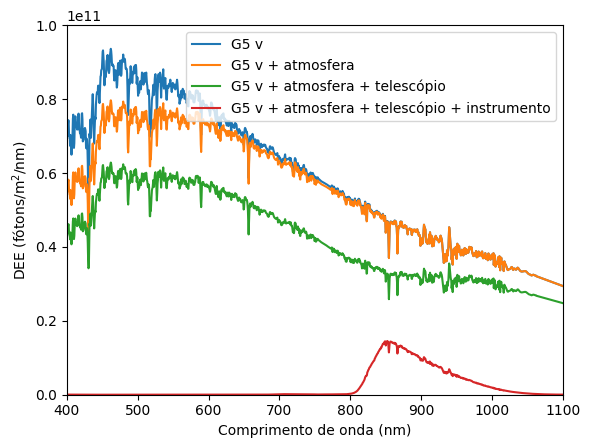

In [1]:
# PLOT SPECTRAL LIBRARY WITH ATM + TELESCOPE + SPARC4
from AIS.Artificial_Image_Simulator import Artificial_Image_Simulator
import matplotlib.pyplot as plt

ccd_operation_mode = {
    "em_mode": "Conv",
    "em_gain": 1,
    "preamp": 1,
    "readout": 1,
    "binn": 1,
    "t_exp": 1,
    "image_size": 100,
}

ais = Artificial_Image_Simulator(ccd_operation_mode, 4, -70)

ais.create_source_sed("spectral_library", 15, (400, 1100, 100), spectral_type="g5v")
ais.create_sky_sed("new")
plt.plot(ais.wavelength, ais.source_sed[0], label="G5 v")
ais.apply_atmosphere_spectral_response()
plt.plot(ais.wavelength, ais.source_sed[0], label="G5 v + atmosfera")
ais.apply_telescope_spectral_response()
plt.plot(ais.wavelength, ais.source_sed[0], label="G5 v + atmosfera + telescópio")
ais.apply_sparc4_spectral_response("photometry")
plt.plot(
    ais.wavelength, ais.source_sed, label="G5 v + atmosfera + telescópio + instrumento"
)
plt.legend()
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel(r"DEE (fótons/m$^2$/nm)")
plt.xlim(400, 1100)
plt.ylim(0, 1e11)
plt.savefig("notebook/figures/spectral_library.png", dpi=300)
plt.show()

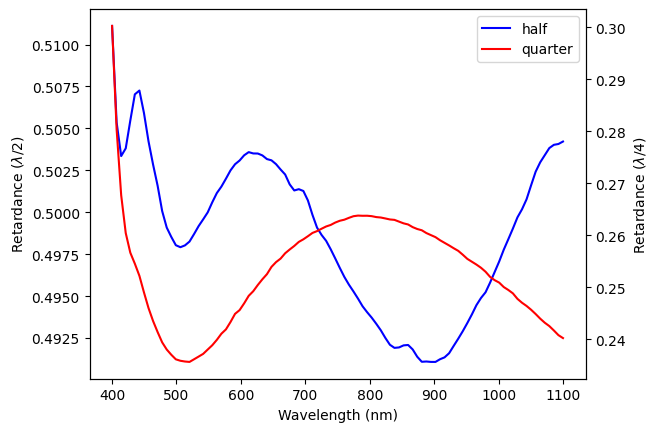

In [16]:
# PLOT SPECTRAL RESPONSE SHIFTS OF THE RETARDER WAVEPLATES

from AIS.Spectral_Response import Channel

import numpy as np

import matplotlib.pyplot as plt
import os


wv = np.linspace(400, 1100, 100)
sed = np.ones(100)


ch = Channel(1)

ch.obj_wavelength = wv
half = ch._get_spectral_response_custom("retarder_phase_diff_half.csv", "Retardance")

quarter = ch._get_spectral_response_custom(
    "retarder_phase_diff_quarter.csv", "Retardance"
)

fig, ax1 = plt.subplots()

ax1.plot(wv, half, "b", label="half")

ax1.set_xlabel("Wavelength (nm)")

ax1.set_ylabel(r"Retardance ($\lambda/2$)")


ax2 = ax1.twinx()

ax2.plot(wv, quarter, "r", label="quarter")

ax2.set_ylabel(r"Retardance ($\lambda/4$)")


fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.savefig(os.path.join("notebook/figures/waveplate_retardance.png"), dpi=300)

plt.show()